# Importing Data

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import datetime as dt
from numpy import mean
import matplotlib.pyplot as plt
n = 100  # every 100th line = 1% of the lines
df = pd.read_csv("steam_reviews.csv", header=0, skiprows=lambda i: i % n != 0)
pd.set_option('display.max_columns', 23)
df.info()
print('Reading finished!')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217473 entries, 0 to 217472
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      217473 non-null  int64  
 1   app_id                          217473 non-null  int64  
 2   app_name                        217473 non-null  object 
 3   review_id                       217473 non-null  int64  
 4   language                        217473 non-null  object 
 5   review                          217120 non-null  object 
 6   timestamp_created               217473 non-null  int64  
 7   timestamp_updated               217473 non-null  int64  
 8   recommended                     217473 non-null  bool   
 9   votes_helpful                   217473 non-null  int64  
 10  votes_funny                     217473 non-null  int64  
 11  weighted_vote_score             217473 non-null  float64
 12  comment_count   

# RQ3

What is the most common time that authors review an application? For example, authors usually write a review at 17:44.

In [4]:
#Converting to date and time format and drop sec
RQ3_1 = pd.DataFrame(df['timestamp_created'])
RQ3_1['timestamp_created'] = pd.to_datetime(RQ3_1['timestamp_created'],unit='s')
RQ3_1["timestamp_created"] = RQ3_1["timestamp_created"].dt.time
RQ3_1['timestamp_created'] = RQ3_1['timestamp_created'].apply(lambda t: t.replace(second=0))
RQ3_1['timestamp_created'].value_counts()

15:05:00    229
14:31:00    227
15:25:00    224
16:12:00    222
16:30:00    216
           ... 
06:46:00     98
06:02:00     97
07:01:00     97
06:15:00     88
03:39:00     87
Name: timestamp_created, Length: 1440, dtype: int64

Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.

In [5]:
#Converting to date and time format
RQ3_2 = pd.DataFrame(df['timestamp_created'])
RQ3_2['timestamp_created'] = pd.DataFrame(df['timestamp_created'])
RQ3_2['timestamp_created'] = pd.to_datetime(RQ3_2['timestamp_created'],unit='s')
RQ3_2["timestamp_created"] = RQ3_2["timestamp_created"].dt.time

In [6]:
def num_of_review():
    Initial_time = pd.to_datetime(input("Initial_time:")).time()
    Final_time = pd.to_datetime(input("Final_time:")).time()
    review = RQ3_2[RQ3_2["timestamp_created"]>=Initial_time]
    review1 = RQ3_2[RQ3_2["timestamp_created"]<=Final_time]
    int_review = pd.merge(review, review1, how ='inner', on =['timestamp_created'])
    print(int_review)
    print("Number of review:" ,len(int_review))

In [7]:
num_of_review()

Initial_time:14:00:00
Final_time:17:00:00
       timestamp_created
0               14:03:33
1               14:03:33
2               14:03:33
3               14:03:33
4               14:03:33
...                  ...
140688          15:15:14
140689          16:54:38
140690          16:25:30
140691          15:46:37
140692          15:16:44

[140693 rows x 1 columns]
Number of review: 140693


Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

In [16]:
Initial_time_list = ['06:00:00','11:00:00','14:00:00','17:00:00','20:00:00','00:00:00','03:00:00']
Final_time_list = ['10:59:59','13:59:59','16:59:59','19:59:59','23:59:59','02:59:59','05:59:59']
rev_num = list()

In [17]:
def num_of_review2(x,y):
    Initial_time = pd.to_datetime(x).time()
    Final_time = pd.to_datetime(y).time()
    review = RQ3_2[RQ3_2["timestamp_created"]>=Initial_time]
    review1 = RQ3_2[RQ3_2["timestamp_created"]<=Final_time]
    int_review = pd.merge(review, review1, how ='inner', on =['timestamp_created'])
    rev_num.append(len(int_review))
    print("Number of review:" ,len(int_review))

In [18]:
rev_num = list()

for i, j in zip(Initial_time_list, Final_time_list):
    num_of_review2(i,j)
df_new = pd.DataFrame({'Initial_time_list':Initial_time_list,'Final_time_list':Final_time_list,'rev_num':rev_num})
df_new

Number of review: 125921
Number of review: 111104
Number of review: 140684
Number of review: 130907
Number of review: 128357
Number of review: 75049
Number of review: 68369


,Initial_time_list,Final_time_list,rev_num
0,06:00:00,10:59:59,125921
1,11:00:00,13:59:59,111104
2,14:00:00,16:59:59,140684
3,17:00:00,19:59:59,130907
4,20:00:00,23:59:59,128357
5,00:00:00,02:59:59,75049
6,03:00:00,05:59:59,68369


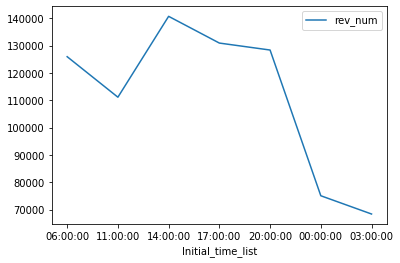

In [19]:
import matplotlib.pyplot as plt
   
data = {'Time': Initial_time_list,
        'Review': rev_num
       }
  
df_plot = pd.DataFrame(df_new,columns=['Initial_time_list','rev_num'])
df_plot.plot(x ='Initial_time_list', y='rev_num', kind = 'line')
plt.show()

# RQ6

What is the average time (days and minutes) a user lets pass before he updates a review?

In [20]:
#Converting to date and time format
RQ6_1 = pd.DataFrame(df[['author.steamid','timestamp_created','timestamp_updated']])
RQ6_1['timestamp_created'] = pd.to_datetime(RQ6_1['timestamp_created'],unit='s')
RQ6_1['timestamp_updated'] = pd.to_datetime(RQ6_1['timestamp_updated'],unit='s')
RQ6_1.head(5)

,author.steamid,timestamp_created,timestamp_updated
0,76561198273074828,2021-01-22 19:33:38,2021-01-22 19:33:38
1,76561199040272654,2021-01-22 14:03:33,2021-01-22 14:03:33
2,76561198196080886,2021-01-22 06:00:42,2021-01-22 06:00:42
3,76561198347082913,2021-01-21 19:18:50,2021-01-21 19:18:50
4,76561198183278214,2021-01-21 12:48:08,2021-01-21 12:48:08


In [21]:
RQ6_1['time_passed'] = RQ6_1['timestamp_updated'] - RQ6_1['timestamp_created']
print('Average review update time is: ',RQ6_1['time_passed'].mean())
RQ6_1.head(5)

Average review update time is:  36 days 12:40:57.289502


,author.steamid,timestamp_created,timestamp_updated,time_passed
0,76561198273074828,2021-01-22 19:33:38,2021-01-22 19:33:38,0 days
1,76561199040272654,2021-01-22 14:03:33,2021-01-22 14:03:33,0 days
2,76561198196080886,2021-01-22 06:00:42,2021-01-22 06:00:42,0 days
3,76561198347082913,2021-01-21 19:18:50,2021-01-21 19:18:50,0 days
4,76561198183278214,2021-01-21 12:48:08,2021-01-21 12:48:08,0 days


In [22]:
RQ6_1['author.steamid'].value_counts()

76561198148679941    4
76561198007784964    4
76561198113005018    4
76561198429316256    4
76561198202605194    4
                    ..
76561198201438635    1
76561198904535462    1
76561198079647962    1
76561198344151455    1
76561198227128320    1
Name: author.steamid, Length: 214699, dtype: int64

# TQ3

In the knapsack problem we are given n objects and each object i has a weight w_i and a value v_i. We are also given a weight budget W. The problem is to select a set of objects with total weight bounded by W that maximized the sum of their values. The following are three natural heuristics:

To solve knapsack we construct a table with the following dimensions.
[n + 1][W + 1]
The rows of the table correspond to items from 0 to n.
The columns of the table correspond to weight limit from 0 to W.
The index of the very last cell of the table would be : [n][W]
Value of the cell with index [i][j] represents the maximum profit possible when considering items from 0 to i and the total weight limit as j.


For each cell [i][j], we have two options :
1. Either we include object [i] in our final selection.
2. Or we don’t include object [i] in our final selection.

There are two conditions that should be satisfied to include object [i] :
1. The total weight after including object [i] should not exceed the weight limit.
2. The profit after including object [i] should be greater as compared to when the object is not included.

In [242]:
def knapSack(W, wt, val): 
    n=len(val)
    table = [[0 for x in range(W + 1)] for x in range(n + 1)] 
#We will be using nested for loops to traverse through the table and fill entires in each cell. 

    for i in range(n + 1): 
        for j in range(W + 1): 
            if i == 0 or j == 0:#setting the 0th row and column to 0. 
                table[i][j] = 0
            elif wt[i-1] <= j: #checks that the weight of the i(th) object is less that the total weight permissible for that cell (j).
                table[i][j] = max(val[i-1] + table[i-1][j-wt[i-1]],  table[i-1][j])#selecting the maximum out of the two options available to us. We can either include the object or exclude it. 
            else: 
                table[i][j] = table[i-1][j] #when the weight of ith object is greater than the permissible limit (j).
   
    return table[n][W] 

Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded

In [243]:
val = [50,100,150,200]
wt = [8,16,32,40]
W = 64
 
print(knapSack(W, wt, val))

350


Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded

In [244]:
val = [50,100,150,200]
wt = [40,32,16,8]
W = 64
 
print(knapSack(W, wt, val))

450


Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if the budget is not exceeded

In [245]:
val = [200,150,100,50]
wt = [40,32,16,8]
W = 64
 
print(knapSack(W, wt, val))

350
